In [43]:
# /*==========================================================================================*\
# **                        _           _ _   _     _  _         _                            **
# **                       | |__  _   _/ | |_| |__ | || |  _ __ | |__                         **
# **                       | '_ \| | | | | __| '_ \| || |_| '_ \| '_ \                        **
# **                       | |_) | |_| | | |_| | | |__   _| | | | | | |                       **
# **                       |_.__/ \__,_|_|\__|_| |_|  |_| |_| |_|_| |_|                       **
# \*==========================================================================================*/


# -----------------------------------------------------------------------------------------------
# Author: Bùi Tiến Thành (@bu1th4nh)
# Title: dataPreprocess.ipynb
# Date: 2024/09/12 13:56:42
# Description: Pre-process the data for the Breast Cancer dataset, Cross-omics setting
# 
# (c) bu1th4nh. All rights reserved
# -----------------------------------------------------------------------------------------------


import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


DATA_PATH = '/home/ti514716/Datasets/BreastCancer'

In [44]:
# Parquet-ize the data
import os
if not os.path.exists(f'{DATA_PATH}/raw_parquet'):
    os.makedirs(f'{DATA_PATH}/raw_parquet')
    pd.read_csv(f'{DATA_PATH}/bipartite_targetscan_gene.csv').to_parquet(f'{DATA_PATH}/raw_parquet/bipartite_targetscan_gene.parquet')
    pd.read_csv(f'{DATA_PATH}/brca_clinical.csv').to_parquet(f'{DATA_PATH}/raw_parquet/brca_clinical.parquet')
    pd.read_csv(f'{DATA_PATH}/miRNA.csv').to_parquet(f'{DATA_PATH}/raw_parquet/miRNA.parquet')
    pd.read_csv(f'{DATA_PATH}/mRNA.csv').to_parquet(f'{DATA_PATH}/raw_parquet/mRNA.parquet')

# Data Acquisition

In [45]:
raw_bipart_data = pd.read_parquet(f'{DATA_PATH}/raw_parquet/bipartite_targetscan_gene.parquet')
raw_clinical = pd.read_parquet(f'{DATA_PATH}/raw_parquet/brca_clinical.parquet')
raw_miRNA = pd.read_parquet(f'{DATA_PATH}/raw_parquet/miRNA.parquet')
raw_mRNA = pd.read_parquet(f'{DATA_PATH}/raw_parquet/mRNA.parquet')

# Elementary Data Analysis

### mRNA and miRNA

In [46]:
# Sampling
display(raw_mRNA.head())
display(raw_miRNA.head())

,sample,TCGA-AR-A5QQ-01,TCGA-D8-A1JA-01,TCGA-BH-A0BQ-01,TCGA-BH-A0BT-01,TCGA-A8-A06X-01,TCGA-A8-A096-01,TCGA-BH-A0C7-01,TCGA-AC-A5XU-01,TCGA-PE-A5DE-01,...,TCGA-A7-A13E-11,TCGA-C8-A8HP-01,TCGA-E9-A5FL-01,TCGA-AC-A2FB-11,TCGA-E2-A15F-01,TCGA-A2-A3XT-01,TCGA-B6-A0X7-01,TCGA-BH-A1EV-11,TCGA-3C-AALJ-01,TCGA-B6-A0X1-01
0,ARHGEF10L,9.5074,7.4346,9.3216,9.0198,9.6417,9.7665,10.0931,9.1524,9.9398,...,9.6265,10.1826,9.9199,9.9090,10.0334,11.5144,10.5745,9.4048,10.9468,10.3164
1,HIF3A,1.5787,3.6607,2.7224,1.3414,0.5819,0.2738,3.6090,0.4738,2.9378,...,8.1546,2.2159,3.8645,8.1872,0.8836,1.3169,4.0696,7.2537,0.9310,2.4191
2,RNF17,0.0000,0.6245,0.5526,0.0000,0.0000,0.8765,0.0000,0.0000,0.0000,...,0.0000,0.0000,3.7305,0.0000,0.0000,1.1329,0.4258,0.0000,0.0000,0.0000
3,RNF10,11.3676,11.9181,11.9665,13.1881,12.0036,11.8118,11.3820,11.5004,12.2055,...,11.9869,12.2653,12.4815,11.8263,12.0135,11.5818,11.8663,11.5460,12.2616,12.1570
4,RNF11,11.1292,13.5273,11.4105,11.0911,11.2545,10.8554,10.7663,10.4358,11.2210,...,11.9344,11.4117,10.4902,11.5754,10.8370,10.2736,10.7644,11.8774,10.7842,11.2420


,sample,TCGA-OL-A66H-01,TCGA-3C-AALK-01,TCGA-AR-A1AH-01,TCGA-AC-A5EH-01,TCGA-EW-A2FW-01,TCGA-E9-A1R0-01,TCGA-BH-A0BL-01,TCGA-AR-A1AJ-01,TCGA-A7-A13G-01,...,TCGA-E2-A574-01,TCGA-E2-A1IG-01,TCGA-5L-AAT0-01,TCGA-E9-A1NH-01,TCGA-EW-A6SA-01,TCGA-AR-A24Q-01,TCGA-BH-A1F0-01,TCGA-E9-A1RB-11,TCGA-GM-A4E0-01,TCGA-AC-A5XU-01
0,MIMAT0019868,0.2381,NaN,NaN,NaN,0.1951,NaN,NaN,0.4831,0.537604,...,NaN,NaN,NaN,0.709,NaN,NaN,NaN,NaN,NaN,NaN
1,MIMAT0019869,NaN,0.2117,NaN,NaN,0.1951,0.6706,NaN,NaN,NaN,...,NaN,NaN,0.348594,NaN,NaN,NaN,0.7569,0.1298,NaN,NaN
2,MIMAT0019860,NaN,NaN,NaN,NaN,NaN,NaN,0.403,0.4831,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MIMAT0019862,NaN,NaN,NaN,NaN,0.1951,NaN,NaN,NaN,NaN,...,NaN,0.4285,NaN,NaN,0.3034,0.5908,0.7569,NaN,NaN,0.2444
4,MIMAT0019863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Shape
print(f'mRNA shape: {raw_mRNA.shape[0]} rows and {raw_mRNA.shape[1]} columns')
print(f'miRNA shape: {raw_miRNA.shape[0]} rows and {raw_miRNA.shape[1]} columns')

mRNA shape: 20530 rows and 1219 columns
miRNA shape: 2238 rows and 833 columns


In [48]:
# Columns
print(f'mRNA columns: {len(raw_mRNA.columns)}  :  {list(raw_mRNA.columns)}')
print(f'miRNA columns: {len(raw_miRNA.columns)}  :  {list(raw_miRNA.columns)}')
print()
# Intersection
Ariel = set(raw_mRNA.columns) & set(raw_miRNA.columns)
print(f'Intersection:  {len(Ariel)}  :  {Ariel}')
print()
# Difference
Ariel = set(raw_mRNA.columns) - set(raw_miRNA.columns)
print(f'Sample Difference:  {len(Ariel)}  :  {Ariel}')
Ariel = set(raw_miRNA.columns) - set(raw_mRNA.columns)
print(f'Sample Difference:  {len(Ariel)}  :  {Ariel}')

mRNA columns: 1219  :  ['sample', 'TCGA-AR-A5QQ-01', 'TCGA-D8-A1JA-01', 'TCGA-BH-A0BQ-01', 'TCGA-BH-A0BT-01', 'TCGA-A8-A06X-01', 'TCGA-A8-A096-01', 'TCGA-BH-A0C7-01', 'TCGA-AC-A5XU-01', 'TCGA-PE-A5DE-01', 'TCGA-PE-A5DC-01', 'TCGA-AR-A0TV-01', 'TCGA-GM-A3XG-01', 'TCGA-BH-A18J-01', 'TCGA-BH-A0W7-01', 'TCGA-E9-A3QA-01', 'TCGA-A7-A4SD-01', 'TCGA-BH-A0HA-01', 'TCGA-AR-A5QN-01', 'TCGA-A7-A0CH-11', 'TCGA-A7-A0CE-01', 'TCGA-AR-A0U1-01', 'TCGA-EW-A1OZ-01', 'TCGA-A2-A0EY-01', 'TCGA-A8-A09R-01', 'TCGA-LL-A440-01', 'TCGA-BH-A8FY-01', 'TCGA-E2-A1II-01', 'TCGA-A7-A6VX-01', 'TCGA-C8-A273-01', 'TCGA-BH-A1EO-01', 'TCGA-OL-A5RX-01', 'TCGA-BH-A0B9-01', 'TCGA-EW-A1P5-01', 'TCGA-AO-A03P-01', 'TCGA-AN-A0AS-01', 'TCGA-A2-A1G0-01', 'TCGA-B6-A0I8-01', 'TCGA-A7-A4SA-01', 'TCGA-E9-A1RC-11', 'TCGA-A7-A0DB-11', 'TCGA-AR-A24S-01', 'TCGA-BH-A0H9-11', 'TCGA-LD-A74U-01', 'TCGA-D8-A1XA-01', 'TCGA-D8-A1XR-01', 'TCGA-A8-A07Z-01', 'TCGA-E2-A1IJ-01', 'TCGA-GM-A2DH-01', 'TCGA-BH-A0AY-01', 'TCGA-BH-A42V-01', 'TCGA-B6-A0IH-01

In [49]:
# 1st columns - mRNA/miRNA value

# Why 'sample'? Because of Pandas' read_csv mechanism. It is not very intuitive, but it is what it is.
mRNA_for_genes = raw_mRNA['sample']
miRNA_for_genes = raw_miRNA['sample']

print(f'mRNAs: {len(mRNA_for_genes)} :  {list(mRNA_for_genes)}')
print(f'miRNAs: {len(miRNA_for_genes)} :  {list(miRNA_for_genes)}')

mRNAs: 20530 :  ['ARHGEF10L', 'HIF3A', 'RNF17', 'RNF10', 'RNF11', 'RNF13', 'GTF2IP1', 'REM1', 'MTVR2', 'RTN4RL2', 'C16orf13', 'C16orf11', 'FGFR1OP2', 'TSKS', 'ATRX', 'PMM2', 'LOC100272146', 'ASS1', 'NCBP1', 'ZNF709', 'ZNF708', 'RBM14', 'NCBP2', 'DISC1', 'CAMK1', 'RPL37', 'SPR', 'ZNF700', 'ZNF707', 'CAMK4', 'ZNF704', 'LOC339240', 'GOLGA6B', 'RNF115', 'RNF112', 'ZC3H14', 'SPN', 'HMGCLL1', 'NACAP1', 'LRRTM1', 'GRIN1', 'RBMY1A3P', 'DHX8', 'DHX9', 'LOC441204', 'TCOF1', 'LRRTM3', 'NUP98', 'XPC', 'SLC12A2', 'GRINA', 'LRRTM2', 'NUP93', 'HAP1', 'KLRA1', 'CAMKV', 'SPPL3', 'GOLIM4', 'ZNF646', 'OPA3', 'OPA1', 'RHEB', 'RAB40C', 'RAB40B', 'RAB40A', 'COL7A1', 'MDP1', 'GTSE1', 'FAM183A', 'ARFRP1', 'OVCH1', 'FAM183B', 'PSAP', 'KIAA0831', 'SPPL2A', 'SLC46A1', 'TGFBR2', 'ITGA8', 'ITGA9', 'STK40', 'MYO3B', 'ATP2A1', 'ATP2A2', 'ATP2A3', 'ITGA1', 'ITGA2', 'ITGA3', 'ITGA4', 'ITGA5', 'ITGA6', 'ITGA7', 'TRHR', 'LOC100132288', 'DENND4A', 'DENND4B', 'DENND4C', 'SWAP70', 'RARRES1', 'LOC100132287', 'PHLDA3', 'PHLD

### Bipatitite Data

In [50]:
# Sampling
display(raw_bipart_data.head())

,gene_name,MIMAT0000441,MIMAT0000755,MIMAT0000250,MIMAT0000064,MIMAT0000098,MIMAT0000075,MIMAT0000732,MIMAT0002834,MIMAT0000255,...,MIMAT0002172,MIMAT0000736,MIMAT0000252,MIMAT0000770,MIMAT0001545,MIMAT0000692,MIMAT0000753,MIMAT0000450,MIMAT0000081,MIMAT0000281
0,ARF5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M6PR,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,FKBP4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CYP26B1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,FUCA2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Shape
print(f'bipart_data shape: {raw_bipart_data.shape[0]} rows and {raw_bipart_data.shape[1]} columns')
print()

# Columns
print(f'bipart_data columns: {len(raw_bipart_data.columns)}  :  {list(raw_bipart_data.columns)}')
print()

# 1st column - mRNAs aka 'rows'
mRNA_bipart = raw_bipart_data['gene_name']   
print(f'mRNA: {len(mRNA_bipart)} :  {list(mRNA_bipart)}')

bipart_data shape: 11329 rows and 280 columns

bipart_data columns: 280  :  ['gene_name', 'MIMAT0000441', 'MIMAT0000755', 'MIMAT0000250', 'MIMAT0000064', 'MIMAT0000098', 'MIMAT0000075', 'MIMAT0000732', 'MIMAT0002834', 'MIMAT0000255', 'MIMAT0000278', 'MIMAT0000076', 'MIMAT0000269', 'MIMAT0002819', 'MIMAT0002878', 'MIMAT0000758', 'MIMAT0000452', 'MIMAT0022726', 'MIMAT0000083', 'MIMAT0000266', 'MIMAT0002856', 'MIMAT0000074', 'MIMAT0000416', 'MIMAT0003331', 'MIMAT0002853', 'MIMAT0001536', 'MIMAT0000447', 'MIMAT0003233', 'MIMAT0005796', 'MIMAT0004774', 'MIMAT0004564', 'MIMAT0000091', 'MIMAT0000458', 'MIMAT0000093', 'MIMAT0000707', 'MIMAT0000092', 'MIMAT0000765', 'MIMAT0000430', 'MIMAT0001631', 'MIMAT0001625', 'MIMAT0001341', 'MIMAT0002846', 'MIMAT0022697', 'MIMAT0027571', 'MIMAT0000254', 'MIMAT0000617', 'MIMAT0004955', 'MIMAT0000096', 'MIMAT0000425', 'MIMAT0000721', 'MIMAT0005793', 'MIMAT0000737', 'MIMAT0002177', 'MIMAT0000761', 'MIMAT0000078', 'MIMAT0000085', 'MIMAT0004952', 'MIMAT0000448'

### Clinical Data

In [52]:
# Sampling
display(raw_clinical.head())

,Unnamed: 0,ER,HER2,PR,TN
0,TCGA-5T-A9QA-01,Positive,Negative,Negative,Negative
1,TCGA-A1-A0SE-01,Positive,Negative,Positive,Negative
2,TCGA-A1-A0SH-01,Negative,Negative,Positive,Negative
3,TCGA-A1-A0SJ-01,Positive,Negative,Positive,Negative
4,TCGA-A1-A0SM-01,Positive,Positive,Negative,Negative


In [53]:
# Shape
print(f'clinical shape: {raw_clinical.shape[0]} rows and {raw_clinical.shape[1]} columns')
print()

# Columns
print(f'clinical columns: {len(raw_clinical.columns)}  :  {list(raw_clinical.columns)}')
print()

# 1st column - Sample IDs but have "Unnamed: 0"
sample_clinical = raw_clinical['Unnamed: 0']
print(f'Sample: {len(sample_clinical)} :  {list(sample_clinical)}')

clinical shape: 412 rows and 5 columns

clinical columns: 5  :  ['Unnamed: 0', 'ER', 'HER2', 'PR', 'TN']

Sample: 412 :  ['TCGA-5T-A9QA-01', 'TCGA-A1-A0SE-01', 'TCGA-A1-A0SH-01', 'TCGA-A1-A0SJ-01', 'TCGA-A1-A0SM-01', 'TCGA-A1-A0SO-01', 'TCGA-A2-A04N-01', 'TCGA-A2-A04P-01', 'TCGA-A2-A04Q-01', 'TCGA-A2-A04R-01', 'TCGA-A2-A04T-01', 'TCGA-A2-A04U-01', 'TCGA-A2-A04V-01', 'TCGA-A2-A04W-01', 'TCGA-A2-A04X-01', 'TCGA-A2-A04Y-01', 'TCGA-A2-A0CK-01', 'TCGA-A2-A0CL-01', 'TCGA-A2-A0CO-01', 'TCGA-A2-A0CP-01', 'TCGA-A2-A0CQ-01', 'TCGA-A2-A0CR-01', 'TCGA-A2-A0CS-01', 'TCGA-A2-A0CT-01', 'TCGA-A2-A0CU-01', 'TCGA-A2-A0CV-01', 'TCGA-A2-A0CW-01', 'TCGA-A2-A0CY-01', 'TCGA-A2-A0CZ-01', 'TCGA-A2-A0D0-01', 'TCGA-A2-A0D1-01', 'TCGA-A2-A0D2-01', 'TCGA-A2-A0D3-01', 'TCGA-A2-A0D4-01', 'TCGA-A2-A0EM-01', 'TCGA-A2-A0EN-01', 'TCGA-A2-A0EO-01', 'TCGA-A2-A0EP-01', 'TCGA-A2-A0EQ-01', 'TCGA-A2-A0ER-01', 'TCGA-A2-A0ES-01', 'TCGA-A2-A0ET-01', 'TCGA-A2-A0EU-01', 'TCGA-A2-A0EV-01', 'TCGA-A2-A0EW-01', 'TCGA-A2-A0EX-01', 'TCG

# Aligning data to correct format

### mRNA

Sample,TCGA-AR-A5QQ-01,TCGA-D8-A1JA-01,TCGA-BH-A0BQ-01,TCGA-BH-A0BT-01,TCGA-A8-A06X-01,TCGA-A8-A096-01,TCGA-BH-A0C7-01,TCGA-AC-A5XU-01,TCGA-PE-A5DE-01,TCGA-PE-A5DC-01,...,TCGA-A7-A13E-11,TCGA-C8-A8HP-01,TCGA-E9-A5FL-01,TCGA-AC-A2FB-11,TCGA-E2-A15F-01,TCGA-A2-A3XT-01,TCGA-B6-A0X7-01,TCGA-BH-A1EV-11,TCGA-3C-AALJ-01,TCGA-B6-A0X1-01
mRNA_ID,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,9.5074,7.4346,9.3216,9.0198,9.6417,9.7665,10.0931,9.1524,9.9398,9.6287,...,9.6265,10.1826,9.9199,9.9090,10.0334,11.5144,10.5745,9.4048,10.9468,10.3164
HIF3A,1.5787,3.6607,2.7224,1.3414,0.5819,0.2738,3.6090,0.4738,2.9378,4.1136,...,8.1546,2.2159,3.8645,8.1872,0.8836,1.3169,4.0696,7.2537,0.9310,2.4191
RNF17,0.0000,0.6245,0.5526,0.0000,0.0000,0.8765,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,3.7305,0.0000,0.0000,1.1329,0.4258,0.0000,0.0000,0.0000
RNF10,11.3676,11.9181,11.9665,13.1881,12.0036,11.8118,11.3820,11.5004,12.2055,12.1312,...,11.9869,12.2653,12.4815,11.8263,12.0135,11.5818,11.8663,11.5460,12.2616,12.1570
RNF11,11.1292,13.5273,11.4105,11.0911,11.2545,10.8554,10.7663,10.4358,11.2210,10.8013,...,11.9344,11.4117,10.4902,11.5754,10.8370,10.2736,10.7644,11.8774,10.7842,11.2420


278 features in mRNA have all zero values
mRNA shape: 20252 mRNAs and 1218 samples


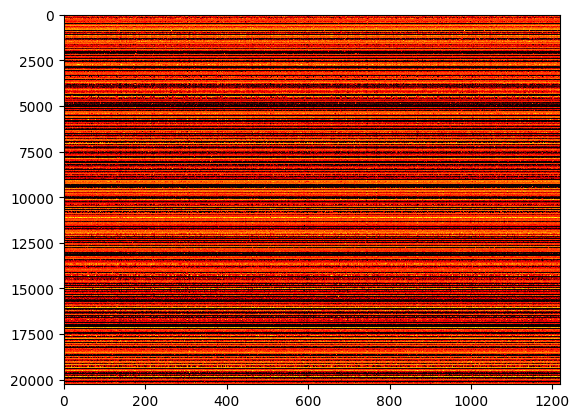

In [54]:
mRNA = raw_mRNA.copy(deep=True)

# Rename first column as 'mRNA ID'
mRNA.rename(columns = {'sample':'mRNA_ID'}, inplace = True)

# Set index as 'mRNA_ID'
mRNA.set_index('mRNA_ID', inplace = True)

# Rename the 'columns' row as 'Sample'
mRNA.columns.name = 'Sample'

# Fill-NA - 0
mRNA.fillna(0, inplace=True)

# Sampling again
display(mRNA.head())

# Zero features
zero_features = []
for feature in mRNA.index:
    if(np.all(mRNA.loc[feature].values == 0)):
        zero_features.append(feature)
print(f'{len(zero_features)} features in mRNA have all zero values')

# Drop zero features
mRNA.drop(zero_features, inplace=True, axis=0)

# Final shape
print(f'mRNA shape: {mRNA.shape[0]} mRNAs and {mRNA.shape[1]} samples')

# Heatmap
plt.imshow(mRNA, cmap='hot', interpolation='nearest', aspect='auto')
plt.show()

### miRNA

Sample,TCGA-OL-A66H-01,TCGA-3C-AALK-01,TCGA-AR-A1AH-01,TCGA-AC-A5EH-01,TCGA-EW-A2FW-01,TCGA-E9-A1R0-01,TCGA-BH-A0BL-01,TCGA-AR-A1AJ-01,TCGA-A7-A13G-01,TCGA-AC-A62Y-01,...,TCGA-E2-A574-01,TCGA-E2-A1IG-01,TCGA-5L-AAT0-01,TCGA-E9-A1NH-01,TCGA-EW-A6SA-01,TCGA-AR-A24Q-01,TCGA-BH-A1F0-01,TCGA-E9-A1RB-11,TCGA-GM-A4E0-01,TCGA-AC-A5XU-01
miRNA_ID,,,,,,,,,,,,,,,,,,,,,
MIMAT0019868,0.2381,0.0000,0.0,0.0,0.1951,0.0000,0.000,0.4831,0.537604,0.000000,...,0.0,0.0000,0.000000,0.709,0.0000,0.0000,0.0000,0.0000,0.0,0.0000
MIMAT0019869,0.0000,0.2117,0.0,0.0,0.1951,0.6706,0.000,0.0000,0.000000,0.535972,...,0.0,0.0000,0.348594,0.000,0.0000,0.0000,0.7569,0.1298,0.0,0.0000
MIMAT0019860,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.403,0.4831,0.000000,0.000000,...,0.0,0.0000,0.000000,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000
MIMAT0019862,0.0000,0.0000,0.0,0.0,0.1951,0.0000,0.000,0.0000,0.000000,0.000000,...,0.0,0.4285,0.000000,0.000,0.3034,0.5908,0.7569,0.0000,0.0,0.2444
MIMAT0019863,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.000,0.0000,0.000000,0.000000,...,0.0,0.0000,0.000000,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000


0 features in miRNA have all zero values
miRNA shape: 2238 miRNAs and 832 samples


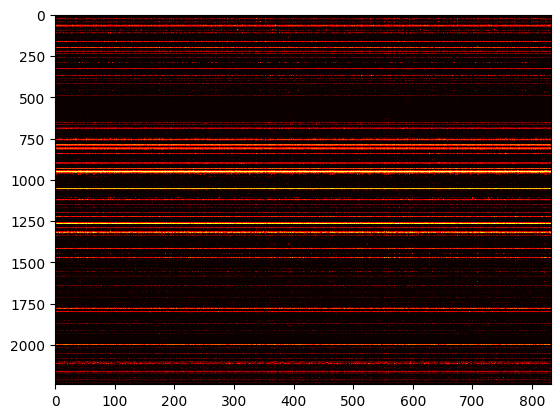

In [55]:
miRNA = raw_miRNA.copy(deep=True)

# Rename first column as 'miRNA ID'
miRNA.rename(columns = {'sample':'miRNA_ID'}, inplace = True)

# Set index as 'miRNA_ID'
miRNA.set_index('miRNA_ID', inplace = True)

# Rename the 'columns' row as 'Sample'
miRNA.columns.name = 'Sample'

# Fill-NA - 0
miRNA.fillna(0, inplace=True)

# Sampling again
display(miRNA.head())

# Zero features
zero_features = []
for feature in miRNA.index:
    if(np.all(miRNA.loc[feature].values == 0)):
        zero_features.append(feature)
print(f'{len(zero_features)} features in miRNA have all zero values')

# Drop zero features
miRNA.drop(zero_features, inplace=True, axis=0)

# Final shape
print(f'miRNA shape: {miRNA.shape[0]} miRNAs and {miRNA.shape[1]} samples')

# Heatmap
plt.imshow(miRNA, cmap='hot', interpolation='nearest', aspect='auto')
plt.show()

### Bipartite Graph

miRNA_ID,MIMAT0000441,MIMAT0000755,MIMAT0000250,MIMAT0000064,MIMAT0000098,MIMAT0000075,MIMAT0000732,MIMAT0002834,MIMAT0000255,MIMAT0000278,...,MIMAT0002172,MIMAT0000736,MIMAT0000252,MIMAT0000770,MIMAT0001545,MIMAT0000692,MIMAT0000753,MIMAT0000450,MIMAT0000081,MIMAT0000281
mRNA_ID,,,,,,,,,,,,,,,,,,,,,
ARF5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M6PR,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
FKBP4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CYP26B1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
FUCA2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Bipart shape: 11329 mRNAs and 279 miRNAs


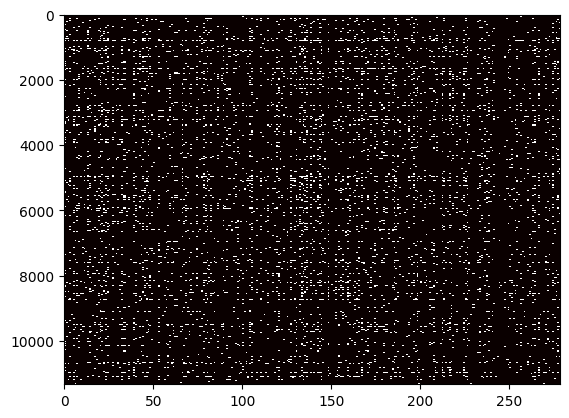

In [56]:
bipart = raw_bipart_data.copy(deep=True)

# Rename first column ('gene_name') as 'mRNA ID'
bipart.rename(columns = {'gene_name':'mRNA_ID'}, inplace = True)

# Set index as 'mRNA_ID'
bipart.set_index('mRNA_ID', inplace = True)

# Rename the 'columns' row as 'miRNA_ID'
bipart.columns.name = 'miRNA_ID'

# Sampling again
display(bipart.head())

# Final shape
print(f'Bipart shape: {bipart.shape[0]} mRNAs and {bipart.shape[1]} miRNAs')

# Heatmap
plt.imshow(bipart, cmap='hot', interpolation='nearest', aspect='auto')
plt.show()

### Clinical Data

In [57]:
clinical = raw_clinical.copy(deep=True)

# Rename first column as 'Sample'
clinical.rename(columns = {'Unnamed: 0':'Sample'}, inplace = True)

# Set index as 'Sample'
clinical.set_index('Sample', inplace = True)

# Display
display(clinical.head())

# Final shape
print(f'Clinical shape: {clinical.shape[0]} samples and {clinical.shape[1]} features as {list(clinical.columns)}')

,ER,HER2,PR,TN
Sample,,,,
TCGA-5T-A9QA-01,Positive,Negative,Negative,Negative
TCGA-A1-A0SE-01,Positive,Negative,Positive,Negative
TCGA-A1-A0SH-01,Negative,Negative,Positive,Negative
TCGA-A1-A0SJ-01,Positive,Negative,Positive,Negative
TCGA-A1-A0SM-01,Positive,Positive,Negative,Negative


Clinical shape: 412 samples and 4 features as ['ER', 'HER2', 'PR', 'TN']


# Aggregating Data

In [58]:
# Sample again all data
display(f'mRNA shape: {mRNA.shape[0]} mRNAs and {mRNA.shape[1]} samples')
display(mRNA.head())


display(f'miRNA shape: {miRNA.shape[0]} miRNAs and {miRNA.shape[1]} samples')
display(miRNA.head())


display(f'Bipart shape: {bipart.shape[0]} mRNAs and {bipart.shape[1]} miRNAs')
display(bipart.head())


display(f'Clinical shape: {clinical.shape[0]} samples and {clinical.shape[1]} features as {list(clinical.columns)}')
display(clinical.head())

'mRNA shape: 20252 mRNAs and 1218 samples'

Sample,TCGA-AR-A5QQ-01,TCGA-D8-A1JA-01,TCGA-BH-A0BQ-01,TCGA-BH-A0BT-01,TCGA-A8-A06X-01,TCGA-A8-A096-01,TCGA-BH-A0C7-01,TCGA-AC-A5XU-01,TCGA-PE-A5DE-01,TCGA-PE-A5DC-01,...,TCGA-A7-A13E-11,TCGA-C8-A8HP-01,TCGA-E9-A5FL-01,TCGA-AC-A2FB-11,TCGA-E2-A15F-01,TCGA-A2-A3XT-01,TCGA-B6-A0X7-01,TCGA-BH-A1EV-11,TCGA-3C-AALJ-01,TCGA-B6-A0X1-01
mRNA_ID,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,9.5074,7.4346,9.3216,9.0198,9.6417,9.7665,10.0931,9.1524,9.9398,9.6287,...,9.6265,10.1826,9.9199,9.9090,10.0334,11.5144,10.5745,9.4048,10.9468,10.3164
HIF3A,1.5787,3.6607,2.7224,1.3414,0.5819,0.2738,3.6090,0.4738,2.9378,4.1136,...,8.1546,2.2159,3.8645,8.1872,0.8836,1.3169,4.0696,7.2537,0.9310,2.4191
RNF17,0.0000,0.6245,0.5526,0.0000,0.0000,0.8765,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,3.7305,0.0000,0.0000,1.1329,0.4258,0.0000,0.0000,0.0000
RNF10,11.3676,11.9181,11.9665,13.1881,12.0036,11.8118,11.3820,11.5004,12.2055,12.1312,...,11.9869,12.2653,12.4815,11.8263,12.0135,11.5818,11.8663,11.5460,12.2616,12.1570
RNF11,11.1292,13.5273,11.4105,11.0911,11.2545,10.8554,10.7663,10.4358,11.2210,10.8013,...,11.9344,11.4117,10.4902,11.5754,10.8370,10.2736,10.7644,11.8774,10.7842,11.2420


'miRNA shape: 2238 miRNAs and 832 samples'

Sample,TCGA-OL-A66H-01,TCGA-3C-AALK-01,TCGA-AR-A1AH-01,TCGA-AC-A5EH-01,TCGA-EW-A2FW-01,TCGA-E9-A1R0-01,TCGA-BH-A0BL-01,TCGA-AR-A1AJ-01,TCGA-A7-A13G-01,TCGA-AC-A62Y-01,...,TCGA-E2-A574-01,TCGA-E2-A1IG-01,TCGA-5L-AAT0-01,TCGA-E9-A1NH-01,TCGA-EW-A6SA-01,TCGA-AR-A24Q-01,TCGA-BH-A1F0-01,TCGA-E9-A1RB-11,TCGA-GM-A4E0-01,TCGA-AC-A5XU-01
miRNA_ID,,,,,,,,,,,,,,,,,,,,,
MIMAT0019868,0.2381,0.0000,0.0,0.0,0.1951,0.0000,0.000,0.4831,0.537604,0.000000,...,0.0,0.0000,0.000000,0.709,0.0000,0.0000,0.0000,0.0000,0.0,0.0000
MIMAT0019869,0.0000,0.2117,0.0,0.0,0.1951,0.6706,0.000,0.0000,0.000000,0.535972,...,0.0,0.0000,0.348594,0.000,0.0000,0.0000,0.7569,0.1298,0.0,0.0000
MIMAT0019860,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.403,0.4831,0.000000,0.000000,...,0.0,0.0000,0.000000,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000
MIMAT0019862,0.0000,0.0000,0.0,0.0,0.1951,0.0000,0.000,0.0000,0.000000,0.000000,...,0.0,0.4285,0.000000,0.000,0.3034,0.5908,0.7569,0.0000,0.0,0.2444
MIMAT0019863,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.000,0.0000,0.000000,0.000000,...,0.0,0.0000,0.000000,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000


'Bipart shape: 11329 mRNAs and 279 miRNAs'

miRNA_ID,MIMAT0000441,MIMAT0000755,MIMAT0000250,MIMAT0000064,MIMAT0000098,MIMAT0000075,MIMAT0000732,MIMAT0002834,MIMAT0000255,MIMAT0000278,...,MIMAT0002172,MIMAT0000736,MIMAT0000252,MIMAT0000770,MIMAT0001545,MIMAT0000692,MIMAT0000753,MIMAT0000450,MIMAT0000081,MIMAT0000281
mRNA_ID,,,,,,,,,,,,,,,,,,,,,
ARF5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M6PR,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
FKBP4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CYP26B1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
FUCA2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


"Clinical shape: 412 samples and 4 features as ['ER', 'HER2', 'PR', 'TN']"

,ER,HER2,PR,TN
Sample,,,,
TCGA-5T-A9QA-01,Positive,Negative,Negative,Negative
TCGA-A1-A0SE-01,Positive,Negative,Positive,Negative
TCGA-A1-A0SH-01,Negative,Negative,Positive,Negative
TCGA-A1-A0SJ-01,Positive,Negative,Positive,Negative
TCGA-A1-A0SM-01,Positive,Positive,Negative,Negative


In [59]:
common_samples = list(set(mRNA.columns) & set(miRNA.columns))
print(f'Common samples: {len(common_samples)} - {list(common_samples)}')
print(f'% of common samples wrt mRNA: {len(common_samples) / len(mRNA.columns) * 100:.2f}%')
print(f'% of common samples wrt miRNA: {len(common_samples) / len(miRNA.columns) * 100:.2f}%')
print('\n')

common_mRNAs = list(set(mRNA.index) & set(bipart.index))
print(f'Common mRNAs: {len(common_mRNAs)} - {list(common_mRNAs)}')
print(f'% of common mRNAs wrt mRNA: {len(common_mRNAs) / len(mRNA.index) * 100:.2f}%')
print(f'% of common mRNAs wrt bipart: {len(common_mRNAs) / len(bipart.index) * 100:.2f}%')
print('\n')

common_miRNAs = list(set(miRNA.index) & set(bipart.columns))
print(f'Common miRNAs: {len(common_miRNAs)} - {list(common_miRNAs)}')
print(f'% of common miRNAs wrt miRNA: {len(common_miRNAs) / len(miRNA.index) * 100:.2f}%')
print(f'% of common miRNAs wrt bipart: {len(common_miRNAs) / len(bipart.columns) * 100:.2f}%')

Common samples: 830 - ['TCGA-A7-A13H-01', 'TCGA-E2-A152-01', 'TCGA-BH-A18K-01', 'TCGA-C8-A12V-01', 'TCGA-OL-A66K-01', 'TCGA-BH-A0BQ-11', 'TCGA-D8-A1XD-01', 'TCGA-AC-A8OP-01', 'TCGA-5T-A9QA-01', 'TCGA-E2-A15K-11', 'TCGA-AC-A5EH-01', 'TCGA-E9-A6HE-01', 'TCGA-D8-A1XT-01', 'TCGA-B6-A409-01', 'TCGA-BH-A1EN-11', 'TCGA-E2-A156-01', 'TCGA-B6-A0RH-01', 'TCGA-EW-A6SA-01', 'TCGA-OL-A66N-01', 'TCGA-AC-A3QQ-01', 'TCGA-B6-A3ZX-01', 'TCGA-BH-A0H5-11', 'TCGA-BH-A1F8-11', 'TCGA-D8-A147-01', 'TCGA-E9-A226-01', 'TCGA-BH-A1FD-11', 'TCGA-BH-A0BP-01', 'TCGA-D8-A1XY-01', 'TCGA-E2-A15G-01', 'TCGA-BH-A208-11', 'TCGA-EW-A6SD-01', 'TCGA-LL-A6FP-01', 'TCGA-E9-A54Y-01', 'TCGA-AC-A8OR-01', 'TCGA-E9-A22A-01', 'TCGA-E2-A159-01', 'TCGA-BH-A1FJ-01', 'TCGA-E2-A1LB-11', 'TCGA-BH-A0BT-11', 'TCGA-E2-A153-11', 'TCGA-E2-A1LS-01', 'TCGA-BH-A0H3-01', 'TCGA-BH-A1EY-01', 'TCGA-AC-A2B8-01', 'TCGA-E9-A1RF-01', 'TCGA-BH-A202-01', 'TCGA-AO-A12F-01', 'TCGA-A7-A6VY-01', 'TCGA-A7-A13G-01', 'TCGA-Z7-A8R5-01', 'TCGA-AC-A3TM-01', 'TCGA-BH

In [60]:
# Sort the indexes
common_samples.sort()
common_mRNAs.sort()
common_miRNAs.sort()

# Align the data
mRNA_common = mRNA.loc[common_mRNAs, common_samples].copy(deep=True)
miRNA_common = miRNA.loc[common_miRNAs, common_samples].copy(deep=True)
bipart_common = bipart.loc[common_mRNAs, common_miRNAs].copy(deep=True)



# Zero features for mRNA_common
zero_features = []
for feature in mRNA_common.index:
    if(np.all(mRNA_common.loc[feature].values == 0)):
        zero_features.append(feature)
print(f'{len(zero_features)} features in mRNA_common have all zero values')

# Zero features for miRNA_common
zero_features = []
for feature in miRNA_common.index:
    if(np.all(miRNA_common.loc[feature].values == 0)):
        zero_features.append(feature)
print(f'{len(zero_features)} features in miRNA_common have all zero values')



display(f'Common mRNA shape: {mRNA_common.shape[0]} mRNAs and {mRNA_common.shape[1]} samples')
display(mRNA_common.head())

display(f'Common miRNA shape: {miRNA_common.shape[0]} miRNAs and {miRNA_common.shape[1]} samples')
display(miRNA_common.head())

display(f'Common bipart shape: {bipart_common.shape[0]} mRNAs and {bipart_common.shape[1]} miRNAs')
display(bipart_common.head())

0 features in mRNA_common have all zero values
0 features in miRNA_common have all zero values


'Common mRNA shape: 10480 mRNAs and 830 samples'

Sample,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SF-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
mRNA_ID,,,,,,,,,,,,,,,,,,,,,
A1BG,7.6300,7.8971,8.7287,7.5851,8.0762,7.6779,8.3001,5.6496,7.1629,8.3532,...,5.4968,8.3353,10.0127,9.0608,6.9166,8.8835,7.8088,8.0008,8.7831,7.9619
A1CF,0.0000,0.0000,0.9310,0.0000,0.5115,0.0000,0.6069,0.0000,0.0000,0.0000,...,0.4846,0.0000,0.0000,0.5603,0.0000,0.0000,0.0000,1.7492,0.0000,0.0000
A4GNT,3.2655,0.6265,0.0000,0.0000,0.5115,2.3523,2.2207,0.9268,0.7326,0.8928,...,0.4846,0.0000,0.6922,1.5353,0.0000,0.8596,0.8379,1.9389,0.0000,0.0000
AAGAB,10.3458,11.7904,10.4113,10.7181,10.8166,10.8867,11.3361,9.7309,10.9316,9.9775,...,11.3978,10.3083,11.7017,10.1852,10.5008,9.6498,10.5380,10.5811,10.6573,10.5149
AAK1,9.0177,9.7301,9.1534,9.5093,9.4079,9.8875,8.4332,10.0352,10.1115,9.3754,...,9.5825,9.6860,8.4134,9.5813,9.3072,8.9643,9.9129,9.8219,9.3383,9.0306


'Common miRNA shape: 277 miRNAs and 830 samples'

Sample,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SF-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
miRNA_ID,,,,,,,,,,,,,,,,,,,,,
MIMAT0000062,15.124849,14.916849,15.013644,15.143310,15.413594,15.314889,15.720944,15.602910,15.603126,14.341908,...,13.398294,14.823079,15.066375,15.711691,15.038787,15.368482,16.037338,15.684479,14.967621,15.354657
MIMAT0000063,14.591428,14.509958,13.417786,14.665232,14.436443,14.574856,15.095598,16.502043,15.637101,14.319066,...,11.393023,13.499891,13.603028,15.207085,13.906266,14.512249,14.337599,14.196586,14.318915,14.114179
MIMAT0000064,8.401837,9.638816,9.304503,11.504435,11.683468,11.131379,9.188562,13.346309,11.401253,11.897654,...,7.357762,10.823890,10.657737,12.464927,11.230791,11.919849,12.358977,12.680574,11.966794,10.369241
MIMAT0000065,7.482535,7.891342,8.116467,7.179990,7.293012,6.993267,8.001244,8.663774,7.741665,7.088881,...,8.175810,7.363713,7.198927,7.636294,8.190430,7.609878,6.659060,7.943300,7.147604,8.743464
MIMAT0000066,10.499502,9.121162,11.389719,10.351892,10.727595,9.694004,11.128364,9.305857,10.536886,9.265151,...,9.941453,10.211138,11.265103,10.740918,10.401965,10.526240,11.082142,11.307832,9.882271,10.915322


'Common bipart shape: 10480 mRNAs and 277 miRNAs'

miRNA_ID,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070,MIMAT0000072,...,MIMAT0019864,MIMAT0022695,MIMAT0022697,MIMAT0022705,MIMAT0022726,MIMAT0022834,MIMAT0025858,MIMAT0026557,MIMAT0026640,MIMAT0027571
mRNA_ID,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
A4GNT,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
AAGAB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAK1,1,1,1,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0


# Saving Data

In [61]:
if not os.path.exists(f'{DATA_PATH}/processed_crossOmics'):
    os.makedirs(f'{DATA_PATH}/processed_crossOmics')

mRNA_common.to_parquet(f'{DATA_PATH}/processed_crossOmics/mRNA.parquet')
miRNA_common.to_parquet(f'{DATA_PATH}/processed_crossOmics/miRNA.parquet')
bipart_common.to_parquet(f'{DATA_PATH}/processed_crossOmics/bipart.parquet')
clinical.to_parquet(f'{DATA_PATH}/processed_crossOmics/clinical.parquet')

# Mini Dataset

In [62]:
sample_mRNA_feature_size = 1000
sample_miRNA_feature_size = miRNA_common.shape[0]
sample_samples_size = 500
folder = 'processed_crossOmics_mini_1000mRNA_500samples'



import random

mini_mRNA = sorted(list(set(random.sample(mRNA_common.index.to_list(), k = sample_mRNA_feature_size))))
mini_miRNA = sorted(list(set(random.sample(miRNA_common.index.to_list(), k = sample_miRNA_feature_size))))
mini_samples = sorted(list(set(random.sample(mRNA_common.columns.to_list(), k = sample_samples_size))))

mRNA_mini = mRNA_common.loc[mini_mRNA, mini_samples].copy(deep=True)
miRNA_mini = miRNA_common.loc[mini_miRNA, mini_samples].copy(deep=True)
bipart_mini = bipart_common.loc[mini_mRNA, mini_miRNA].copy(deep=True)


# Zero features for mRNA_mini
zero_features = []
for feature in mRNA_mini.index:
    if(np.all(mRNA_mini.loc[feature].values == 0)):
        zero_features.append(feature)
mRNA_mini.drop(zero_features, inplace=True, axis=0)
bipart_mini.drop(zero_features, inplace=True, axis=0)
print(f'{len(zero_features)} features in mRNA_mini have all zero values')

# Zero features for miRNA_mini
zero_features = []
for feature in miRNA_mini.index:
    if(np.all(miRNA_mini.loc[feature].values == 0)):
        zero_features.append(feature)
miRNA_mini.drop(zero_features, inplace=True, axis=0)
bipart_mini.drop(zero_features, inplace=True, axis=1)
print(f'{len(zero_features)} features in miRNA_mini have all zero values')


# if not os.path.exists(f'{DATA_PATH}/{folder}'):
#     os.makedirs(f'{DATA_PATH}/{folder}')

# mRNA_mini.to_parquet(f'{DATA_PATH}/{folder}/mRNA.parquet')
# miRNA_mini.to_parquet(f'{DATA_PATH}/{folder}/miRNA.parquet')
# bipart_mini.to_parquet(f'{DATA_PATH}/{folder}/bipart.parquet')
# clinical.to_parquet(f'{DATA_PATH}/{folder}/clinical.parquet')

0 features in mRNA_mini have all zero values
0 features in miRNA_mini have all zero values
